# Boosting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import CleaningCars as cc

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
df=pd.read_csv('vehicles.csv')

In [3]:
df=cc.ultimateClean(df)

Remove outliers...
Remove outliers...
Cleaned outliers !
Imputed Missing Values
One hot encodings done!
Total Time:  6.874693059921265  minutes


In [4]:
from sklearn.preprocessing import StandardScaler

#Standardise features
cols_to_norm = ['year','odometer','lat','long']

df[cols_to_norm] = StandardScaler().fit_transform(df[cols_to_norm])

In [5]:
X=df.drop("price",axis=1)
y=df['price']

In [6]:
X.shape

(388335, 102)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# XGboost

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor()

params={"learning_rate":[0.01, 0.05, 0.1,0.3, 0.5],
       "alpha":[5,10,15,20,25],
       "max_depth":[5,10,20,30,35,40, 45],
       "n_estimators":[100,150,200,500,1000]}

random_search = RandomizedSearchCV(model, param_distributions=params, scoring='neg_mean_squared_error', n_jobs=4, cv=5 )

random_search.fit(X_train, y_train)

print(random_search.best_params_)

In [8]:
import xgboost as xgb

model = xgb.XGBRegressor(learning_rate = 0.1, 
                           max_depth = 20, 
                           alpha = 10, 
                           n_estimators = 200)

model.fit(X_train,y_train)
preds_train= model.predict(X_train)
preds_test = model.predict(X_test)


print(f"MSE on train set: {mean_squared_error(y_train, preds_train)}")
print(f"RMSE on train set: {mean_squared_error(y_train, preds_train)**0.5}")
print()
print(f"MSE on test set:  {mean_squared_error(y_test, preds_test)}")
print(f"RMSE on test set:  {mean_squared_error(y_test, preds_test)**0.5}")

MSE on train set: 1681400.0488783927
RMSE on train set: 1296.6881077878338

MSE on test set:  18506914.684563376
RMSE on test set:  4301.966374178601


MSE on train set: 1681400.0488783927
RMSE on train set: 1296.6881077878338

MSE on test set:  18506914.684563376
RMSE on test set:  4301.966374178601

In [ ]:
from sklearn.model_selection import cross_val_score

model = xgb.XGBRegressor(learning_rate = 0.1, 
                           max_depth = 20, 
                           alpha = 10, 
                           n_estimators = 200)

cv_score=cross_val_score(model, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")


print(cv_score)
print("RMSE CV:", -np.mean(cv_score))

[-4539.40832934 -4530.79744298 -4562.29798048 -4540.67763391
 -4538.37326659]
RMSE CV: 4542.3109306609185

In [9]:
#Set the lowest predicted value to zero (negative predicted values make no sense for price)
import copy

preds_train2 = copy.copy(preds_train)
preds_test2 = copy.copy(preds_test)

preds_train2[preds_train2 < 0] = 0
preds_test2[preds_test2 < 0] = 0

print(f"MSE on train set: {mean_squared_error(y_train, preds_train2)}")
print(f"RMSE on train set: {mean_squared_error(y_train, preds_train2)**0.5}")
print()
print(f"MSE on test set:  {mean_squared_error(y_test, preds_test2)}")
print(f"RMSE on test set:  {mean_squared_error(y_test, preds_test2)**0.5}")

MSE on train set: 1680198.6649892374
RMSE on train set: 1296.224774099476

MSE on test set:  18494230.29625137
RMSE on test set:  4300.491866781214


MSE on train set: 1680198.6649892374
RMSE on train set: 1296.224774099476

MSE on test set:  18494230.29625137
RMSE on test set:  4300.491866781214

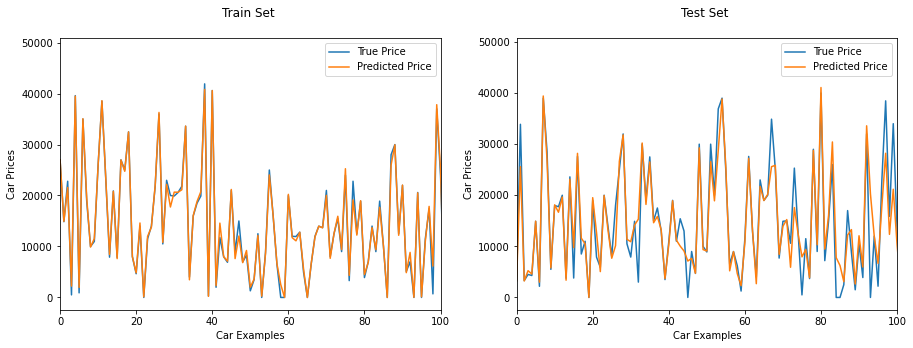

In [10]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

ax[0].plot(np.arange(len(y_train)), y_train, label='True Price')
ax[0].plot(np.arange(len(preds_train2)), preds_train2, label='Predicted Price')
ax[0].set_title("Train Set \n")
ax[0].set_xlabel("Car Examples")
ax[0].set_ylabel("Car Prices")
ax[0].set_xlim(0,100)
#ax[0].set_ylim(0,35)
ax[0].legend()

ax[1].plot(np.arange(len(y_test)), y_test, label='True Price')
ax[1].plot(np.arange(len(preds_test2)), preds_test2, label='Predicted Price')
ax[1].set_title("Test Set \n")
ax[1].set_xlabel("Car Examples")
ax[1].set_ylabel("Car Prices")
ax[1].set_xlim(0,100)
#ax[1].set_ylim(0,35)
ax[1].legend()

plt.show()

Where the model goes wrong

In [13]:
df.head()

,price,year,condition,odometer,lat,long,color_black,color_other,color_silver,color_white,...,manuf_country_USA,manuf_country_missing,tfidf_0,tfidf_2,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,tfidf_9
0,35990,-0.173466,1,-1.012954,-1.050979,0.485853,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
1,7500,0.352056,1,0.016411,-1.058345,0.486507,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,4900,-0.698987,1,-0.094445,-1.046333,0.486732,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2000,-4.903157,1,1.646941,-1.003905,0.500482,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,19500,-0.830367,1,0.395289,-1.058345,0.486507,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [18]:
def prepare(df):
    X = df.drop("price", axis = 1)
    y = df["price"]
    return(X, y)

def catMSE(col):
    df_cat = df[(df[col] == 1)]
    X_cat, y_cat = prepare(df_cat)
    preds_cat = model.predict(X_cat)
    preds_cat[preds_cat<0]=0
    return(mean_squared_error(preds_cat, y_cat))

def catPREDS(col):
    df_cat = df[(df[col] == 1)]
    X_cat, y_cat = prepare(df_cat)
    preds_cat = model.predict(X_cat)
    preds_cat[preds_cat<0]=0
    return y_cat, preds_cat

In [49]:
mylist = df.drop(["price", "year" , "odometer", "lat", "long", 'tfidf_0', 'tfidf_2', 'tfidf_4', 'tfidf_5',
       'tfidf_6', 'tfidf_7', 'tfidf_8', 'tfidf_9'],axis=1).columns
mylist

Index(['condition', 'color_black', 'color_other', 'color_silver',
       'color_white', 'drive_4wd', 'drive_fwd', 'drive_other', 'drive_rwd',
       'transmission_automatic', 'transmission_manual', 'transmission_other',
       'status_clean', 'status_lien', 'status_missing', 'status_parts only',
       'status_rebuilt', 'status_salvage', 'state_ak', 'state_al', 'state_ar',
       'state_az', 'state_ca', 'state_co', 'state_ct', 'state_dc', 'state_de',
       'state_fl', 'state_ga', 'state_hi', 'state_ia', 'state_id', 'state_il',
       'state_in', 'state_ks', 'state_ky', 'state_la', 'state_ma', 'state_md',
       'state_me', 'state_mi', 'state_mn', 'state_mo', 'state_ms', 'state_mt',
       'state_nc', 'state_nd', 'state_ne', 'state_nh', 'state_nj', 'state_nm',
       'state_nv', 'state_ny', 'state_oh', 'state_ok', 'state_or', 'state_pa',
       'state_ri', 'state_sc', 'state_sd', 'state_tn', 'state_tx', 'state_ut',
       'state_va', 'state_vt', 'state_wa', 'state_wi', 'state_wv', 'sta

MSE on condition predictions is 2258.1534955118555


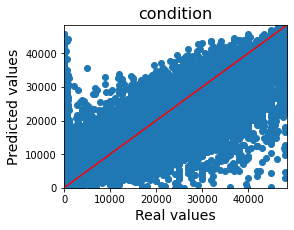

MSE on color_black predictions is 2192.369957318187


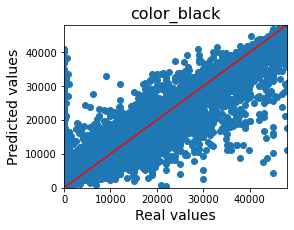

MSE on color_other predictions is 2360.4013091323955


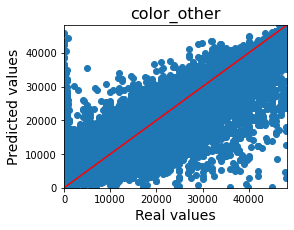

MSE on color_silver predictions is 1834.504525273758


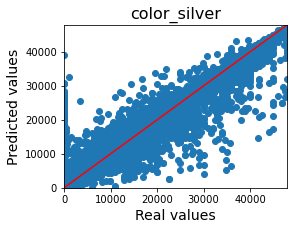

MSE on color_white predictions is 2166.131107023894


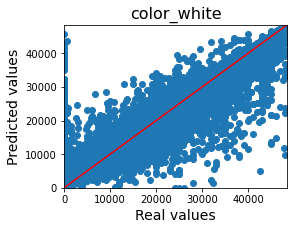

MSE on drive_4wd predictions is 2633.0019936736253


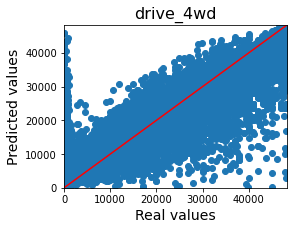

MSE on drive_fwd predictions is 1493.9152679791605


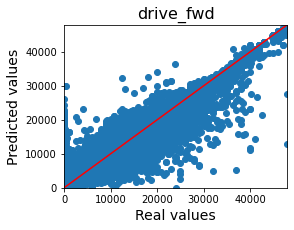

MSE on drive_other predictions is 2414.733856936851


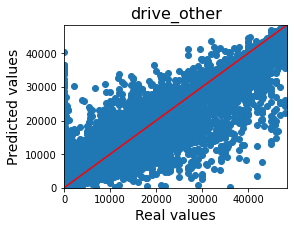

MSE on drive_rwd predictions is 2217.64852789095


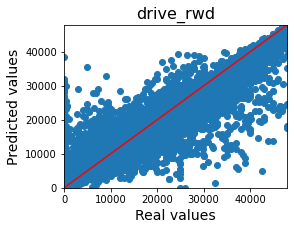

MSE on transmission_automatic predictions is 2296.9874793230138


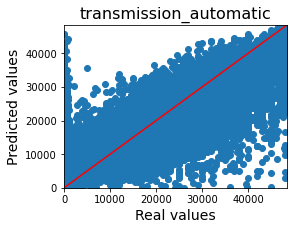

MSE on transmission_manual predictions is 2515.75776448174


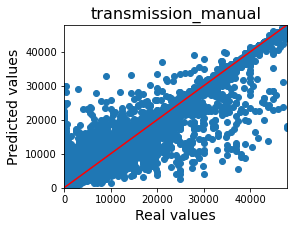

MSE on transmission_other predictions is 1249.7410415390914


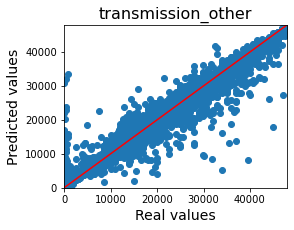

MSE on status_clean predictions is 2255.6957656862674


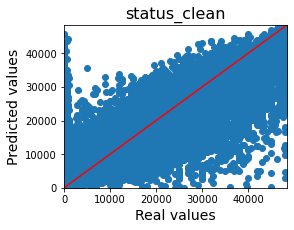

MSE on status_lien predictions is 3061.8427691658753


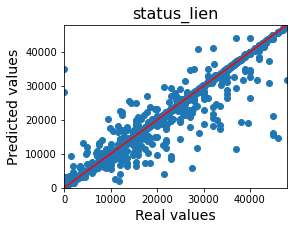

MSE on status_missing predictions is 2190.956285582322


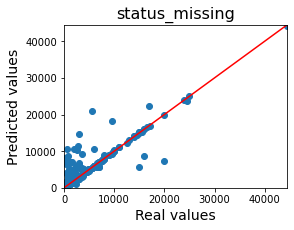

MSE on status_parts only predictions is 1712.1158127483218


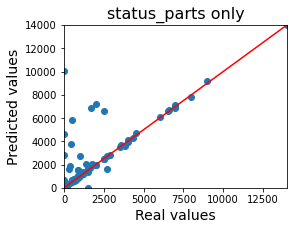

MSE on status_rebuilt predictions is 1700.5128810242238


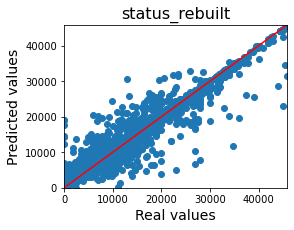

MSE on status_salvage predictions is 1786.9929687758238


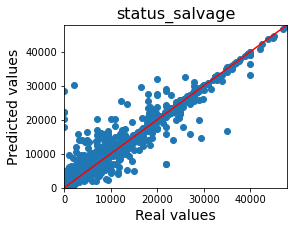

MSE on state_ak predictions is 2738.063378966733


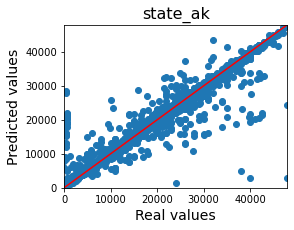

MSE on state_al predictions is 1824.4059102094318


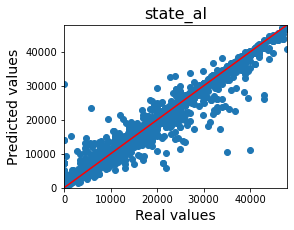

MSE on state_ar predictions is 1898.6296396693554


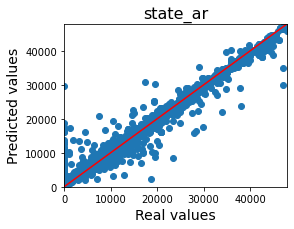

MSE on state_az predictions is 2357.777883177942


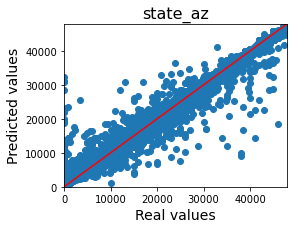

MSE on state_ca predictions is 2404.596460765046


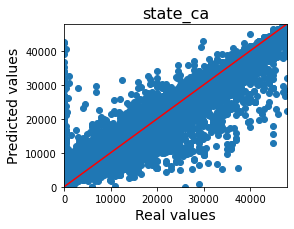

MSE on state_co predictions is 2371.1055876218365


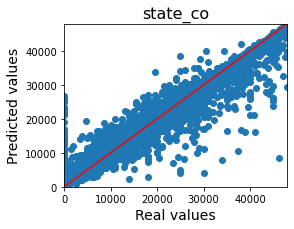

MSE on state_ct predictions is 1593.2212830021986


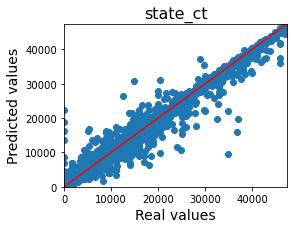

MSE on state_dc predictions is 2289.2454666335548


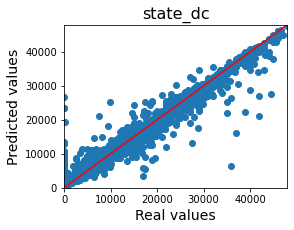

MSE on state_de predictions is 2094.825416291183


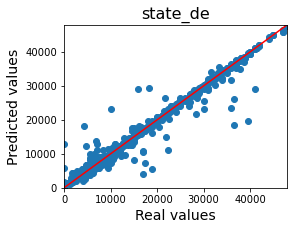

MSE on state_fl predictions is 2045.887079498139


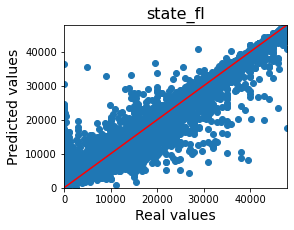

MSE on state_ga predictions is 2087.266260940591


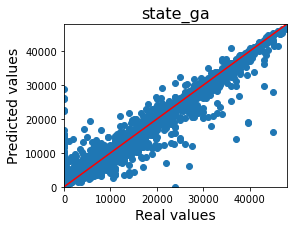

MSE on state_hi predictions is 3121.459274164251


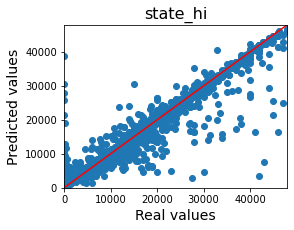

MSE on state_ia predictions is 2039.2054026232718


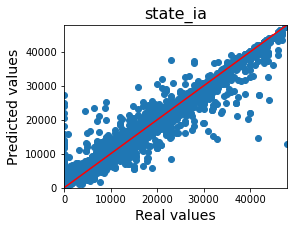

MSE on state_id predictions is 2840.0736979222306


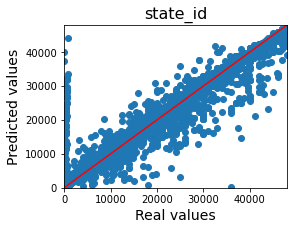

MSE on state_il predictions is 2237.1407236446703


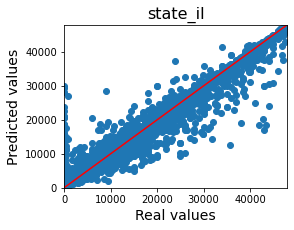

MSE on state_in predictions is 1900.671685299254


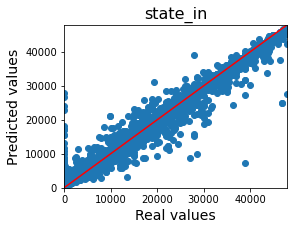

MSE on state_ks predictions is 2069.5552434272895


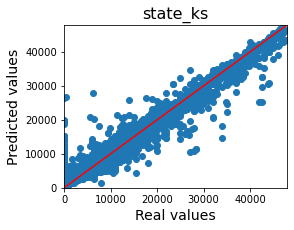

MSE on state_ky predictions is 1835.5057876665167


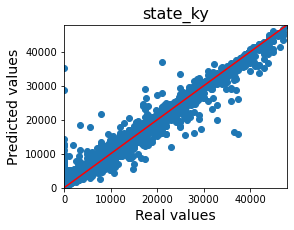

MSE on state_la predictions is 2307.7649660311154


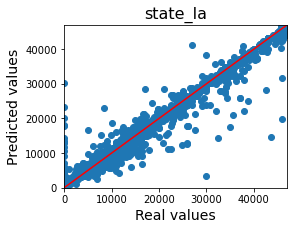

MSE on state_ma predictions is 1976.2844268272954


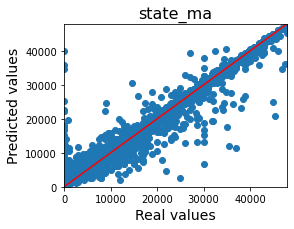

MSE on state_md predictions is 2106.856088674815


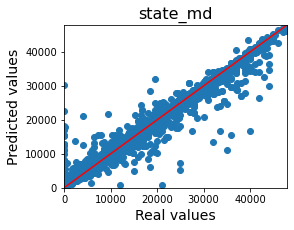

MSE on state_me predictions is 1655.579304538043


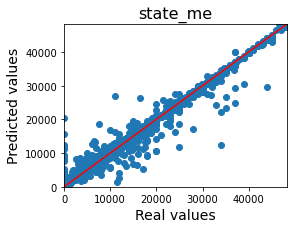

MSE on state_mi predictions is 1807.2612759393292


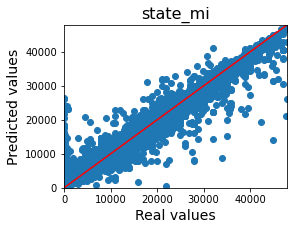

MSE on state_mn predictions is 2086.802592630216


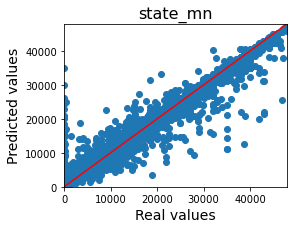

MSE on state_mo predictions is 1973.7674629332114


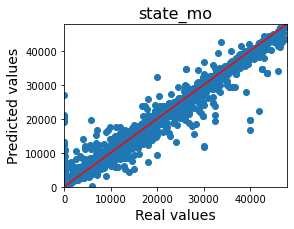

MSE on state_ms predictions is 1605.1734767446158


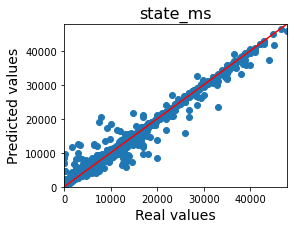

MSE on state_mt predictions is 1329.959270798694


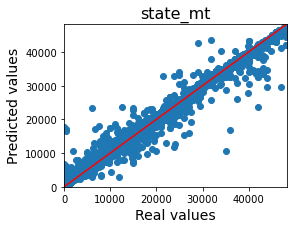

MSE on state_nc predictions is 2161.5240131117935


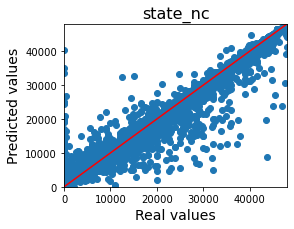

MSE on state_nd predictions is 1803.8582265717548


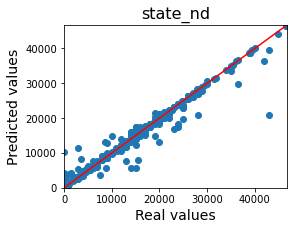

MSE on state_ne predictions is 1503.2839026636516


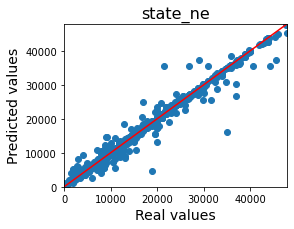

MSE on state_nh predictions is 1985.2750067576785


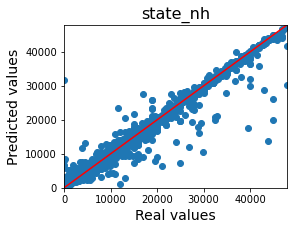

MSE on state_nj predictions is 2324.0457478447042


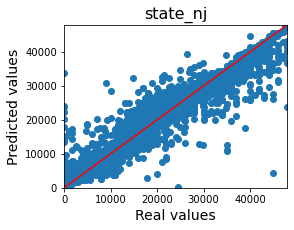

MSE on state_nm predictions is 2128.5848731103843


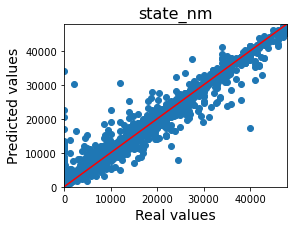

MSE on state_nv predictions is 1724.8015164681128


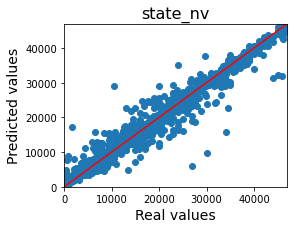

MSE on state_ny predictions is 1955.3641823767684


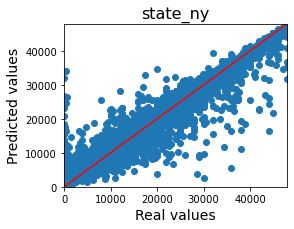

MSE on state_oh predictions is 1787.258472324002


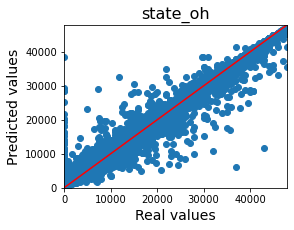

MSE on state_ok predictions is 2280.4093766447395


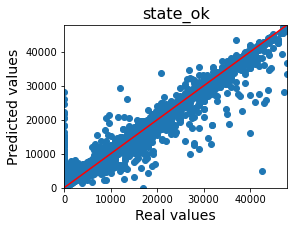

MSE on state_or predictions is 3343.8552189125285


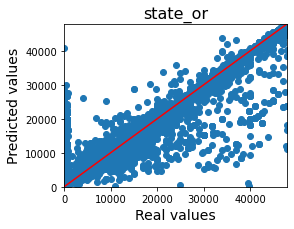

MSE on state_pa predictions is 1674.4312714141827


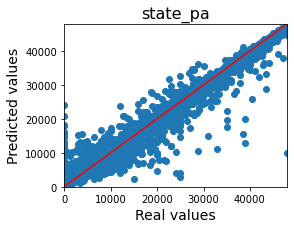

MSE on state_ri predictions is 1480.3073183749718


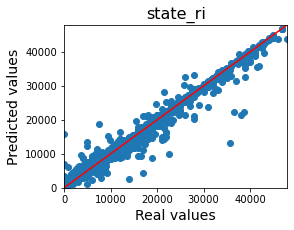

MSE on state_sc predictions is 1816.499134058087


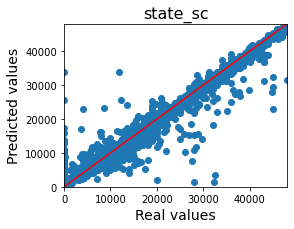

MSE on state_sd predictions is 1915.7140002409417


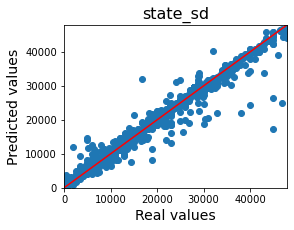

MSE on state_tn predictions is 1950.364826165521


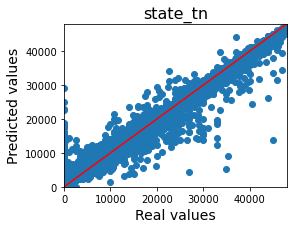

MSE on state_tx predictions is 2400.6777965066008


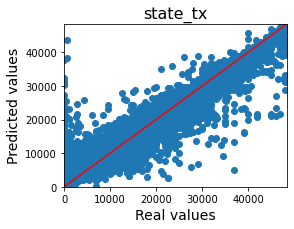

MSE on state_ut predictions is 1704.8261383202


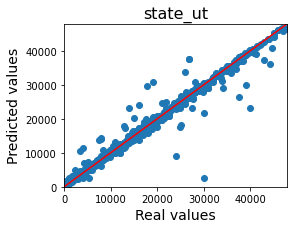

MSE on state_va predictions is 1840.855465417168


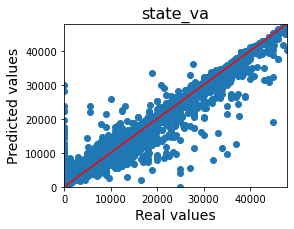

MSE on state_vt predictions is 1612.2682526001129


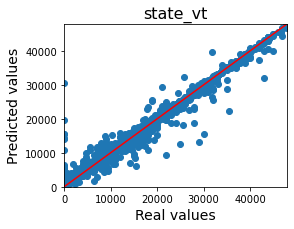

MSE on state_wa predictions is 3911.2512988007206


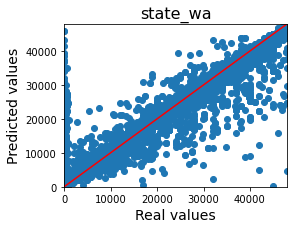

MSE on state_wi predictions is 2223.01467585488


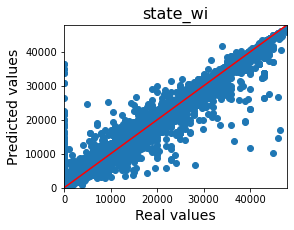

MSE on state_wv predictions is 2051.819685988443


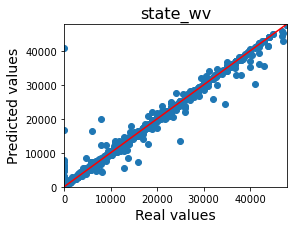

MSE on state_wy predictions is 2184.8654753229857


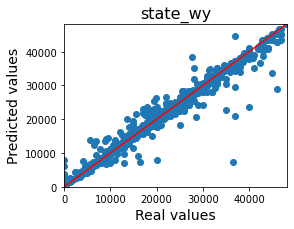

MSE on cylinders_4 cylinders predictions is 1532.1520958296476


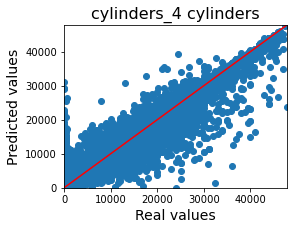

MSE on cylinders_6 cylinders predictions is 2195.3435180480355


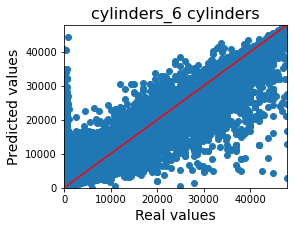

MSE on cylinders_8 cylinders predictions is 2527.1749502898415


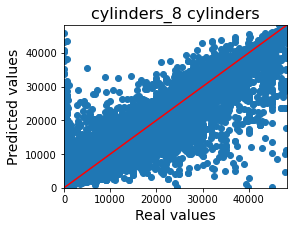

MSE on cylinders_missing predictions is 2513.4359932268335


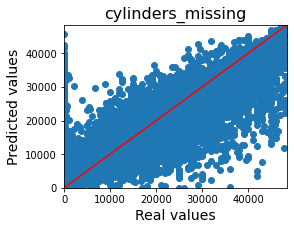

MSE on fuel_diesel predictions is 3427.0859558351317


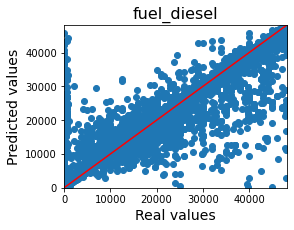

MSE on fuel_electric predictions is 2267.256871567891


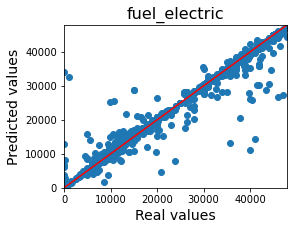

MSE on fuel_gas predictions is 2149.7245602765597


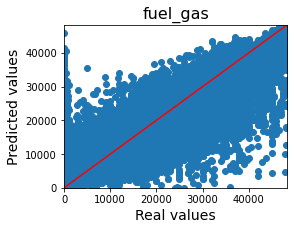

MSE on fuel_hybrid predictions is 1492.5345679725554


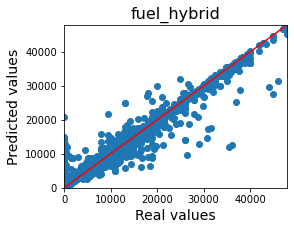

MSE on fuel_other predictions is 2490.6247149599744


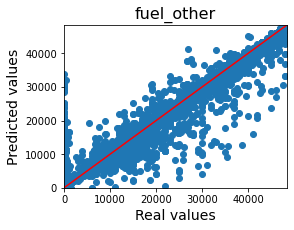

MSE on usage_type_daily predictions is 1985.69354304059


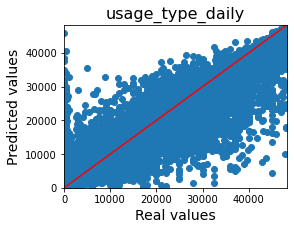

MSE on usage_type_missing predictions is 2439.0317858558606


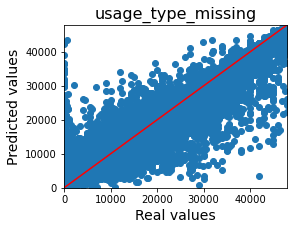

MSE on usage_type_other predictions is 1910.1825808680596


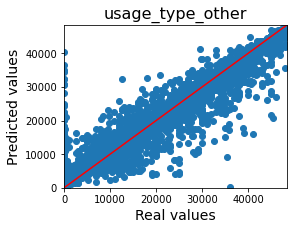

MSE on usage_type_professional predictions is 2718.7266836357853


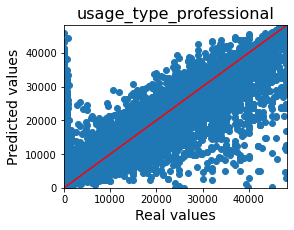

MSE on manuf_country_Germany predictions is 2230.864830473341


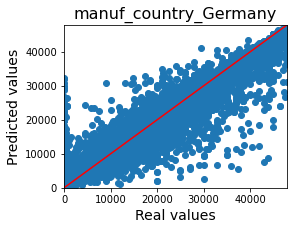

MSE on manuf_country_Italy predictions is 1467.6691436715


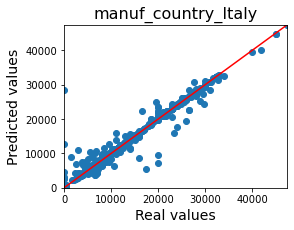

MSE on manuf_country_Japan predictions is 1891.5745424874694


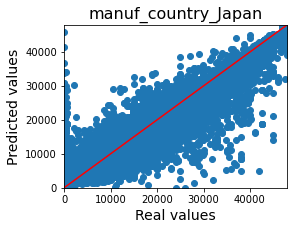

MSE on manuf_country_S.Korea predictions is 1337.1559084268974


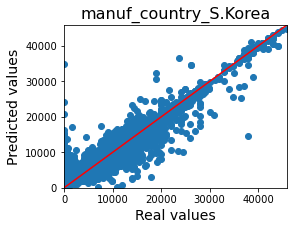

MSE on manuf_country_Sweden predictions is 1617.9433706348766


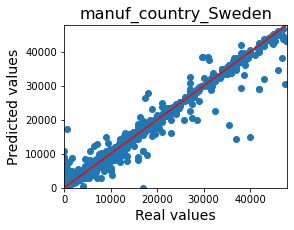

MSE on manuf_country_UK predictions is 2172.9322723180217


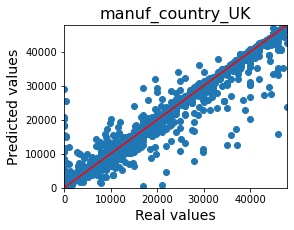

MSE on manuf_country_USA predictions is 2453.7257129612744


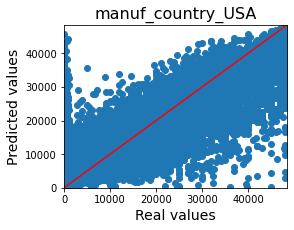

MSE on manuf_country_missing predictions is 2916.349816154539


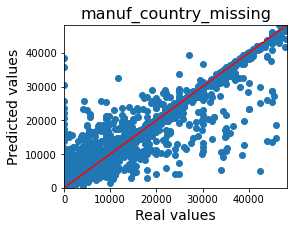

In [50]:
for col in mylist:
    
    cat_y, cat_pred=catPREDS(col)

    print(f"MSE on \033[1m{col}\033[0m predictions is {mean_squared_error(cat_y, cat_pred)**0.5}")
    
    plt.figure(figsize=(4,3))
    plt.xlim(0,max(np.amax(cat_y+1), np.amax(cat_pred+1)))
    plt.ylim(0,max(np.amax(cat_y+1), np.amax(cat_pred+1)))
    plt.plot([0,max(np.amax(cat_y+1), np.amax(cat_pred+1))],[0,max(np.amax(cat_y+1), np.amax(cat_pred+1))], c = "r")
    plt.scatter(cat_y,cat_pred)

    plt.xlabel("Real values", fontsize=14)
    plt.ylabel("Predicted values", fontsize=14)
    plt.title(f"{col}", fontsize=16)
    plt.show()
    


#state_or, state_wa, fuel_diesel

In general it mostly underestimates the higher priced cars and over estimte the cheap cars with real value aroud zero

# LGBM

In [14]:
import lightgbm as lgb

model=lgbmodel=lgb.LGBMRegressor(boosting_type="gbdt",  
                                objective="regression",
                                metric="mse",)

params={"learning_rate":[0.01, 0.05, 0.1, 0.5],
       "num_leaves":[100,500,1000,2000],
       "max_depth":[10,20,30,35,40, 45],
       "n_estimators":[100,200,500,1000, 1200]}

random_search = RandomizedSearchCV(model, param_distributions=params, scoring='neg_mean_squared_error', n_jobs=4, cv=5 )

random_search.fit(X_train, y_train)

print(random_search.best_params_)

RandomizedSearchCV(cv=5,
                   estimator=LGBMRegressor(metric='mse',
                                           objective='regression'),
                   n_jobs=4,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                                        'max_depth': [10, 20, 30, 40],
                                        'n_estimators': [100, 200, 500, 1000],
                                        'num_leaves': [100, 500, 1000, 2000]},
                   scoring='neg_mean_squared_error')

In [15]:
random_search.best_params_

{'num_leaves': 2000,
 'n_estimators': 200,
 'max_depth': 30,
 'learning_rate': 0.1}

In [17]:
model=lgb.LGBMRegressor(learning_rate=0.1,
                        boosting_type="gbdt",  
                        objective="regression",
                        metric="mse",
                        num_leaves=2000,
                        max_depth=30,
                        n_estimators=1000)

model.fit(X_train, y_train)

preds_train=model.predict(X_train)
preds_test=model.predict(X_test)


print(f"MSE on train set: {mean_squared_error(y_train, preds_train)}")
print(f"RMSE on train set: {mean_squared_error(y_train, preds_train)**0.5}")
print()
print(f"MSE on test set:  {mean_squared_error(y_test, preds_test)}")
print(f"RMSE on test set:  {mean_squared_error(y_test, preds_test)**0.5}")

MSE on train set: 1474274.43095301
RMSE on train set: 1214.1970313557063

MSE on test set:  17750711.581710473
RMSE on test set:  4213.159334954053


MSE on train set: 1450707.5653418957
RMSE on train set: 1204.4532225627925

MSE on test set:  17791916.687488742
RMSE on test set:  4218.046548757937

In [13]:
from sklearn.model_selection import cross_val_score

model=lgb.LGBMRegressor(learning_rate=0.1,
                        boosting_type="gbdt",  
                        objective="regression",
                        metric="mse",
                        num_leaves=2000,
                        max_depth=40,
                        n_estimators=1000)

cv_score=cross_val_score(model, X, y, cv=5, scoring="neg_root_mean_squared_error")

print(cv_score)
print("RMSE CV:", -np.mean(cv_score))

[-6575.27742835 -5899.6527421  -5654.14243284 -6246.97119738
 -7012.66697976]
RMSE CV: 6277.742156086253


[-6575.27742835 -5899.6527421  -5654.14243284 -6246.97119738
 -7012.66697976]
RMSE CV: 6277.742156086253

In [9]:
#Set the lowest predicted value to zero (negative predicted values make no sense for price)
import copy

preds_train2 = copy.copy(preds_train)
preds_test2 = copy.copy(preds_test)

preds_train2[preds_train2 < 0] = 0
preds_test2[preds_test2 < 0] = 0

print(f"MSE on train set: {mean_squared_error(y_train, preds_train2)}")
print(f"RMSE on train set: {mean_squared_error(y_train, preds_train2)**0.5}")
print()
print(f"MSE on test set:  {mean_squared_error(y_test, preds_test2)}")
print(f"RMSE on test set:  {mean_squared_error(y_test, preds_test2)**0.5}")

MSE on train set: 1444229.6646083477
RMSE on train set: 1201.761068019907

MSE on test set:  17726394.436102573
RMSE on test set:  4210.272489531119


MSE on train set: 1444229.6646083477
RMSE on train set: 1201.761068019907

MSE on test set:  17726394.436102573
RMSE on test set:  4210.272489531119

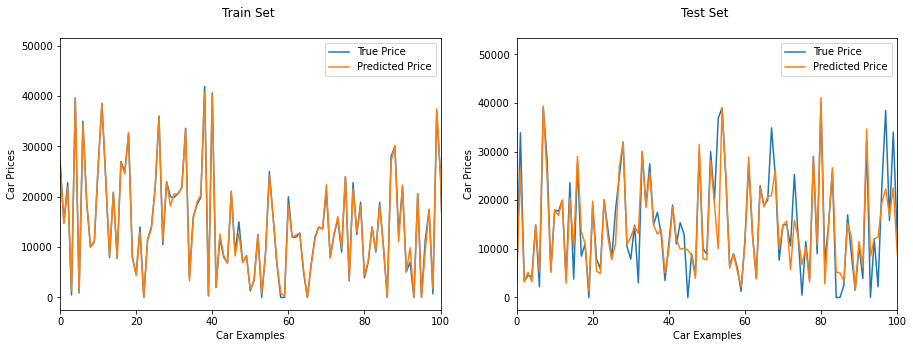

In [10]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

ax[0].plot(np.arange(len(y_train)), y_train, label='True Price')
ax[0].plot(np.arange(len(preds_train2)), preds_train2, label='Predicted Price')
ax[0].set_title("Train Set \n")
ax[0].set_xlabel("Car Examples")
ax[0].set_ylabel("Car Prices")
ax[0].set_xlim(0,100)
#ax[0].set_ylim(0,35)
ax[0].legend()

ax[1].plot(np.arange(len(y_test)), y_test, label='True Price')
ax[1].plot(np.arange(len(preds_test2)), preds_test2, label='Predicted Price')
ax[1].set_title("Test Set \n")
ax[1].set_xlabel("Car Examples")
ax[1].set_ylabel("Car Prices")
ax[1].set_xlim(0,100)
#ax[1].set_ylim(0,35)
ax[1].legend()

plt.show()